In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import losses
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

print(tf.__version__)

2.0.0


In [3]:
img_rows = 75
img_cols = 75
epochs = 15
batch_size = 32
num_of_train_samples = 800
num_of_test_samples = 798

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

validation_generator = test_generator

Found 800 images belonging to 2 classes.
Found 798 images belonging to 2 classes.


Airplane


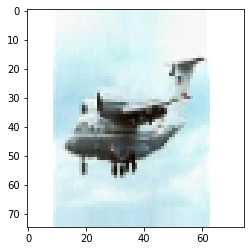

In [4]:
input_image, image_label = train_generator.next()
for i in range(1):
    image = input_image[i]
    print("Airplane" if image_label[i][0] else "Motorbike")
    plt.imshow(image)
    plt.show()

In [15]:
model = Sequential(name="object-classification")

model.add(Conv2D(128, (5, 5), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.1),
              loss=losses.mean_squared_error, 
              metrics=['accuracy'])

print(model.summary())

Model: "object-classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 71, 71, 128)       9728      
_________________________________________________________________
activation_6 (Activation)    (None, 71, 71, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 64)        73792     
_________________________________________________________________
activation_7 (Activation)    (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 3

In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=num_of_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_of_test_samples // batch_size)

Epoch 1/15
25/25 [==============================] - 5s 217ms/step - loss: 0.2509 - accuracy: 0.5575 - val_loss: 0.1936 - val_accuracy: 0.9779
Epoch 2/15
25/25 [==============================] - 4s 160ms/step - loss: 0.1942 - accuracy: 0.6938 - val_loss: 0.0815 - val_accuracy: 0.9401
Epoch 3/15
25/25 [==============================] - 4s 161ms/step - loss: 0.1223 - accuracy: 0.8438 - val_loss: 0.0376 - val_accuracy: 0.9544
Epoch 4/15
25/25 [==============================] - 4s 159ms/step - loss: 0.0951 - accuracy: 0.8788 - val_loss: 0.0361 - val_accuracy: 0.9531
Epoch 5/15
25/25 [==============================] - 4s 158ms/step - loss: 0.0755 - accuracy: 0.8988 - val_loss: 0.0236 - val_accuracy: 0.9753
Epoch 6/15
25/25 [==============================] - 4s 162ms/step - loss: 0.0569 - accuracy: 0.9237 - val_loss: 0.0204 - val_accuracy: 0.9779
Epoch 7/15
25/25 [==============================] - 4s 162ms/step - loss: 0.0565 - accuracy: 0.9312 - val_loss: 0.0371 - val_accuracy: 0.9505
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


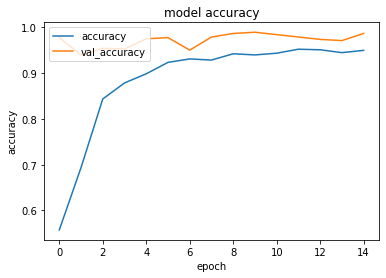

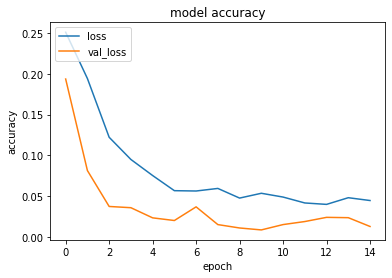

In [17]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [18]:
Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

print('Classification Report')
target_names = ['Airplane', 'Motorbike']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[400   0]
 [ 11 387]]
Classification Report
              precision    recall  f1-score   support

    Airplane       0.97      1.00      0.99       400
   Motorbike       1.00      0.97      0.99       398

    accuracy                           0.99       798
   macro avg       0.99      0.99      0.99       798
weighted avg       0.99      0.99      0.99       798



In [19]:
from tensorflow import math
confusion = confusion_matrix(test_generator.classes,y_pred)
print(confusion)

[[400   0]
 [ 11 387]]


Prediction: Airplane
Correct: Airplane


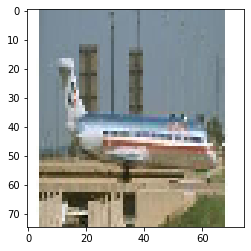

In [20]:
def prediction_check(array):
    if array[0][0] > array[0][1]:
        return "Airplane"
    else:
        return "Motorbike"

input_image, image_label = test_generator.next()
count=0
for i in range(1):
    image = input_image[i]
    predictions = model.predict(np.expand_dims(image, axis=0))
    print("Prediction: {}".format(prediction_check(predictions)))
    print("Correct: {}".format("Airplane" if image_label[i][0] else "Motorbike"))
    plt.imshow(image)
    plt.show()

In [21]:
model.save_weights('CNN.h5')